In [ ]:
# REF https://wikidocs.net/49071

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)  # text에 대해 정수인코딩
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # DTM. index col also included. 
# 4개의 모든 모드에서 단어 순서 정보는 보존되지 않음. 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary')) # 해당 단어가 존재하는지만.

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq')) 
# 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로.

[[0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.25
  0.25       0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.33333333 0.33333333]]


In [7]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf')) 
# 여기서는 TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의. 

[[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1.09861229 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.09861229 1.09861229 1.09861229]]


In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
newsdata = fetch_20newsgroups(subset = 'train') 

In [11]:
newsdata.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [12]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [18]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [19]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [20]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [21]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [23]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [25]:
data.isnull().values.any()

False

In [26]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


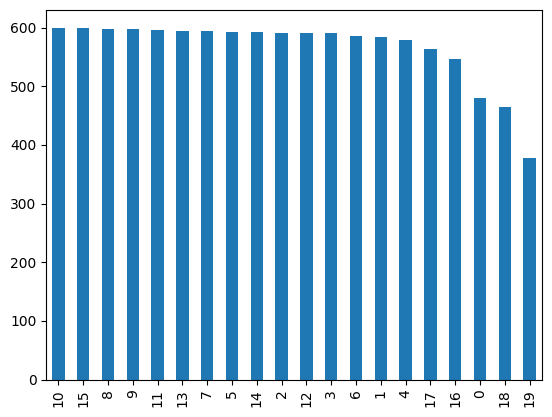

In [27]:
data['target'].value_counts().plot(kind='bar');  # 레이블 값의 분포를 시각화

In [28]:
print(data.groupby('target').size().reset_index(name='count'))  # 구체적인 수치

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [29]:
train_email = data['email']
train_label = data['target'] 

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
test_email = newsdata_test.data
test_label = newsdata_test.target

In [30]:
vocab_size = 10000  # 사용할 최대 단어 개수 정의. 
# 케라스 토크나이저를 사용하면 빈도수 순으로 인덱스를 부여하므로, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용. 
num_classes = 20  

In [31]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [32]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [33]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))
# 본문 열의 개수가 10,000인 것은 위의 prepard_data 함수 내부에서 Tokenizer의 num_words의 인자로 vocab_size를 지정해주었기 때문. 
# 단어의 정수 인덱스는 1부터 시작하지만, 행렬의 인덱스는 0부터 시작하여 0번 인덱스는 사용되지 않으므로 
#     실제로 행렬에는 빈도수 기준 상위 9,999개의 단어가 표현된 셈. 

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [34]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [35]:
index_to_word[0]

KeyError: 0

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [38]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    
    # 1st layer : vocab-size
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu')) # 2, hidden
    model.add(Dropout(0.5)) # to avoid overfitting
    model.add(Dense(128, activation='relu')) # 3, hidden. # 2 hidden layers => DNN
    model.add(Dropout(0.5)) 
    model.add(Dense(num_classes, activation='softmax')) # 4
    # multiclass classification => activation fn softmax, loss fn categorical_crossentropy

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # multiclass classification => 
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [40]:
from tqdm import tqdm
modes = ['binary', 'count', 'tfidf', 'freq'] 

for mode in tqdm(modes):
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) 
    print(mode+' 모드의 테스트 정확도:', score)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

Epoch 1/5
80/80 [==============================] - 2s 25ms/step - loss: 2.2429 - accuracy: 0.3443 - val_loss: 0.9282 - val_accuracy: 0.8339
Epoch 2/5
80/80 [==============================] - 2s 22ms/step - loss: 0.8532 - accuracy: 0.7715 - val_loss: 0.4518 - val_accuracy: 0.8975
Epoch 3/5
80/80 [==============================] - 2s 23ms/step - loss: 0.4204 - accuracy: 0.8860 - val_loss: 0.3430 - val_accuracy: 0.9099
Epoch 4/5
80/80 [==============================] - 2s 23ms/step - loss: 0.2525 - accuracy: 0.9350 - val_loss: 0.3080 - val_accuracy: 0.9108
Epoch 5/5
80/80 [==============================] - 2s 23ms/step - loss: 0.1748 - accuracy: 0.9588 - val_loss: 0.2931 - val_accuracy: 0.9161


 25%|█████████████████████                                                               | 1/4 [00:16<00:50, 16.69s/it]

binary 모드의 테스트 정확도: 0.8281996846199036
Epoch 1/5
80/80 [==============================] - 2s 24ms/step - loss: 2.8296 - accuracy: 0.2520 - val_loss: 1.6705 - val_accuracy: 0.6899
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 1.4249 - accuracy: 0.6221 - val_loss: 0.7265 - val_accuracy: 0.8578
Epoch 3/5
80/80 [==============================] - 2s 23ms/step - loss: 0.8221 - accuracy: 0.7965 - val_loss: 0.5150 - val_accuracy: 0.8772
Epoch 4/5
80/80 [==============================] - 2s 23ms/step - loss: 0.5223 - accuracy: 0.8679 - val_loss: 0.4179 - val_accuracy: 0.8958
Epoch 5/5
80/80 [==============================] - 2s 24ms/step - loss: 0.3727 - accuracy: 0.9146 - val_loss: 0.4005 - val_accuracy: 0.8966


 50%|██████████████████████████████████████████                                          | 2/4 [00:33<00:33, 16.81s/it]

count 모드의 테스트 정확도: 0.8207647204399109
Epoch 1/5
80/80 [==============================] - 3s 24ms/step - loss: 2.2164 - accuracy: 0.3645 - val_loss: 0.7678 - val_accuracy: 0.8560
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 0.8272 - accuracy: 0.7777 - val_loss: 0.3976 - val_accuracy: 0.9028
Epoch 3/5
80/80 [==============================] - 2s 22ms/step - loss: 0.4583 - accuracy: 0.8819 - val_loss: 0.3149 - val_accuracy: 0.9170
Epoch 4/5
80/80 [==============================] - 2s 23ms/step - loss: 0.3043 - accuracy: 0.9269 - val_loss: 0.3206 - val_accuracy: 0.9134
Epoch 5/5
80/80 [==============================] - 2s 22ms/step - loss: 0.2266 - accuracy: 0.9499 - val_loss: 0.3056 - val_accuracy: 0.9178


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:56<00:19, 19.45s/it]

tfidf 모드의 테스트 정확도: 0.830987811088562
Epoch 1/5
80/80 [==============================] - 3s 24ms/step - loss: 2.9819 - accuracy: 0.0823 - val_loss: 2.9499 - val_accuracy: 0.2756
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 2.7983 - accuracy: 0.2244 - val_loss: 2.5007 - val_accuracy: 0.3269
Epoch 3/5
80/80 [==============================] - 2s 22ms/step - loss: 2.2391 - accuracy: 0.3250 - val_loss: 1.9025 - val_accuracy: 0.5565
Epoch 4/5
80/80 [==============================] - 2s 22ms/step - loss: 1.7555 - accuracy: 0.4651 - val_loss: 1.4774 - val_accuracy: 0.6731
Epoch 5/5
80/80 [==============================] - 2s 22ms/step - loss: 1.3881 - accuracy: 0.5726 - val_loss: 1.1819 - val_accuracy: 0.7500


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:13<00:00, 18.26s/it]

freq 모드의 테스트 정확도: 0.6830855011940002
